In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.ensemble import RandomForestRegressor

In [11]:
df = pd.read_csv(r"C:\Users\malar\Downloads\archive\ML2.csv")

In [13]:
df['DateTime']=pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

In [15]:
df['Hour']=df.index.hour
df['Day']=df.index.day
df['Month']=df.index.month
df['Weekday']=df.index.weekday

In [21]:
cal=USFederalHolidayCalendar()
holidays=cal.holidays(start=df.index.min(), end=df.index.max())
df['Holiday']=df.index.isin(holidays).astype(int)

In [23]:
features=['Junction','Hour','Day','Month','Weekday','Holiday']
target='Vehicles'

In [37]:
X_train,X_test,y_train,y_test=train_test_split(df[features],df[target],test_size=0.2,random_state=42,shuffle=False)

In [27]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [29]:
y_pred=model.predict(X_test)

In [31]:
mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 4.599605153782211


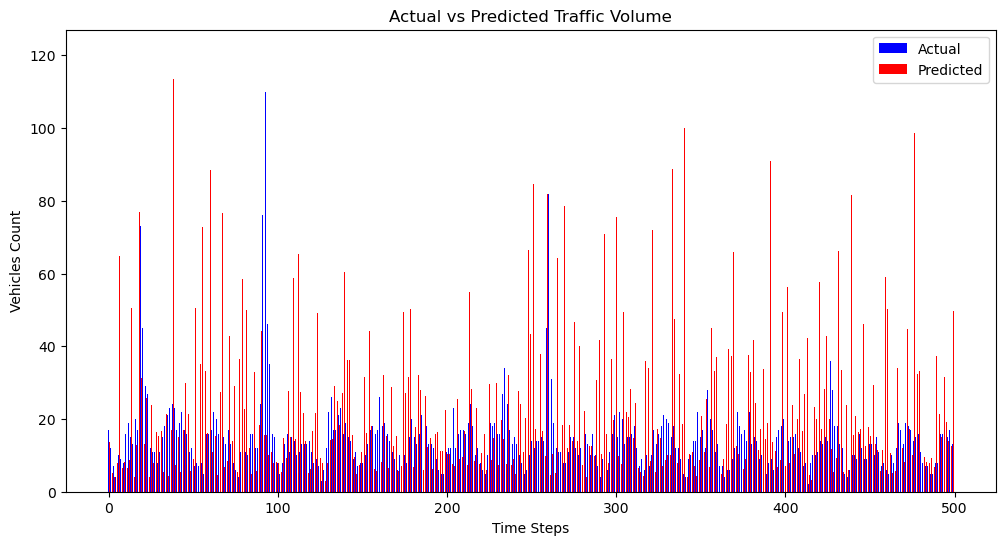

In [43]:
plt.figure(figsize=(12,6))
indices=np.arange(len(y_test[:500]))
plt.bar(indices-0.2,y_test.values[:500],width=0.4,label='Actual',color='blue')
plt.bar(indices+0.2,y_pred[:500],width=0.4,label='Predicted',color='red')
plt.xlabel('Time Steps')
plt.ylabel('Vehicles Count')
plt.title('Actual vs Predicted Traffic Volume')
plt.legend()
plt.show()